In [158]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb, hex2color

import sys
import os

import numpy as np
from numpy_groupies.aggregate_numpy import aggregate
import cytograph as cg
import cytograph.visualization as cgplot

import shoji
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from scipy.cluster.hierarchy import dendrogram, cut_tree

from scipy.spatial.distance import pdist
from sklearn.preprocessing import scale
import fastcluster
import scipy.cluster.hierarchy as hc

db = shoji.connect()

In [142]:
# Load all the data we're going to need
ws = db.builds.sten.humandev20220523.BrainBasicPool
genes = ws.Gene[:]
mean_x = ws.MeanExpression[:]



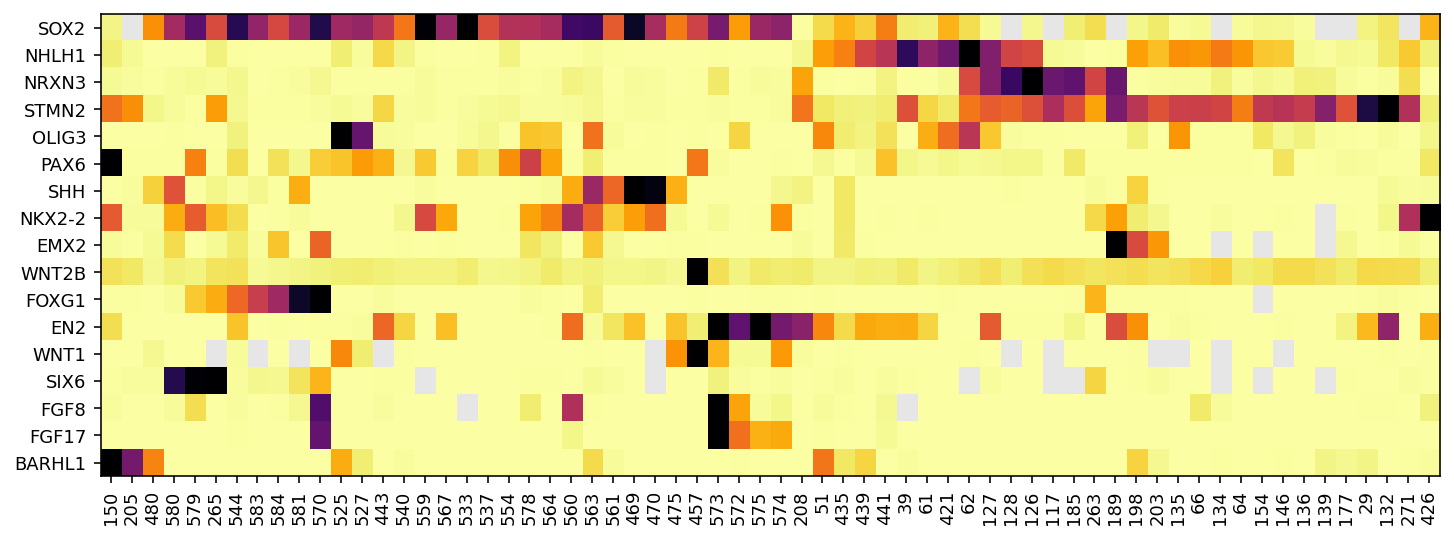

In [176]:
patterning_genes = ['SNAI2', 'SOX10', 'SIX1', 
                    'SHH',
                    'FOXG1', 'DLK1', 'EMX2', 'EMX1', 'PAX3', 'PAX6', 'GSX2', 'DLX1', 
                    'DLX2', 'DLX5', 'DLX6', 'NKX6-2', 'NKX2-1', 
                    'NR2F1', 'NR2F2', 'OTX2', 'PAX7', 'CDH7', 'WNT1', 'FGF8', 'EN1', 'EN2', 'GBX2',
                    'HOXA1', 'HOXB1', 'HOXD1', 'HOXA2', 'HOXB2', 'HOXA3', 'HOXB3', 'HOXD3', 'HOXA4', 
                    'HOXB4', 'HOXC4', 'HOXD4', 'HOXA5', 'HOXB5', 'HOXC5', 'HOXA6', 'HOXB6', 'HOXC6', 
                    'HOXA7', 'HOXB7', 'HOXB8', 'HOXC8', 'HOXD8', 'HOXA9', 'HOXB9', 'HOXC9', 'HOXD9', 
                    'HOXA10', 'HOXC10', 'HOXD10', 'HOXA11', 'HOXC11', 'HOXD11', 'HOXC12', 'HOXD12', 
                    'HOXA13', 'HOXB13', 'HOXC13', 'HOXD13',
                    'SOX2', 'NHLH1', 'NRXN3', 'STMN2']
patterning_genes = [
    'SOX2', 'NHLH1', 'NRXN3', 'STMN2', 'OLIG3', 'PAX6', 'SHH', 'NKX2-2', 'EMX2', 'WNT2B','FOXG1','EN2','WNT1','SIX6', 'FGF8','FGF17','BARHL1']

selected_clusters = np.array([ 29,  39,  51,  61,  62,  64,  66, 117, 126, 127, 128, 132, 134,
       135, 136, 139, 146, 150, 154, 177, 185, 189, 198, 203, 205, 208,
       263, 265, 271, 421, 426, 435, 439, 441, 443, 457, 469, 470, 475,
       480, 525, 527, 533, 537, 540, 544, 554, 559, 560, 561, 563, 564,
       567, 570, 572, 573, 574, 575, 578, 579, 580, 581, 583, 584])

cluster_colors = {
    288: np.array([0.99804688, 0.8984375, 0.79882812]),
    431: np.array([0.87890625, 0.5, 0.765625]),
    263: np.array([0.99609375, 0., 0.0625]),
    265: np.array([0.7265625, 0.51953125, 0.99804688]),
    266: np.array([0.578125, 0.99609375, 0.70703125]),
    39: np.array([0.99609375, 0.796875, 0.59765625]),
    29: np.array([0.46875, 0.31835938, 0.49804688]),
    271: np.array([0.99804688, 0.99804688, 0.5]),
    199: np.array([0.96875, 0.81835938, 0.99804688]),
    203: np.array([0.4375, 0.49804688, 0.19921875]),
    132: np.array([0.1484375, 0., 0.1796875]),
    198: np.array([0., 0.19921875, 0.5]),
    207: np.array([0.99609375, 0.640625, 0.01953125]),
    208: np.array([0.99609375, 0.99609375, 0.]),
    150: np.array([0.75, 0.75, 0.75]),
    205: np.array([0.37890625, 0., 0.265625]),
    139: np.array([0.49804688, 0.49804688, 0.]),
    146: np.array([0., 0.359375, 0.19140625]),
    177: np.array([0.7578125, 0., 0.53125]),
    138: np.array([0.18359375, 0.47070312, 0.47265625]),
    136: np.array([0.08398438, 0.40234375, 0.140625]),
    134: np.array([0.25, 0.25, 0.25]),
    117: np.array([0.29882812, 0.12304688, 0.]),
    120: np.array([0.80664062, 0.8984375, 0.5]),
    185: np.array([0.77929688, 0.7421875, 0.5]),
    184: np.array([0.49804688, 0.3203125, 0.00976562]),
    426: np.array([0.79882812, 0.62304688, 0.5]),
    189: np.array([0.5, 0.79882812, 0.77929688]),
    66: np.array([0.99804688, 0.65625, 0.50976562]),
    64: np.array([0.12890625, 0.19921875, 0.]),
    135: np.array([0., 0.59765625, 0.55859375]),
    62: np.array([0.55859375, 0.484375, 0.]),
    154: np.array([0., 0.29882812, 0.27929688]),
    126: np.array([0.29882812, 0., 0.]),
    127: np.array([0.6484375, 0.5, 0.6796875]),
    128: np.array([0.30664062, 0.3984375, 0.]),
    435: np.array([0.49804688, 0., 0.03125]),
    51: np.array([0.58398438, 0.90234375, 0.640625]),
    439: np.array([0.49804688, 0.328125, 0.36523438]),
    540: np.array([0.5, 0.59960938, 0.75]),
    441: np.array([0.2578125, 0.3984375, 0.]),
    61: np.array([0.99804688, 0.99804688, 0.75]),
    421: np.array([0.5, 0.5, 0.5]),
    420: np.array([0.49804688, 0.15625, 0.00976562]),
    443: np.array([0.68359375, 0.97070312, 0.97265625]),
    554: np.array([0., 0.09960938, 0.25]),
    559: np.array([0.7890625, 0.99804688, 0.85351562]),
    525: np.array([0.79882812, 0.5, 0.5]),
    527: np.array([0.62890625, 0.69921875, 0.5]),
    533: np.array([0.16796875, 0.8046875, 0.28125]),
    537: np.array([0.27929688, 0.2421875, 0.]),
    560: np.array([0., 0.22851562, 0.4296875]),
    575: np.array([0., 0.45703125, 0.859375]),
    574: np.array([0., 0.1796875, 0.09570312]),
    573: np.array([0.59765625, 0.24609375, 0.]),
    572: np.array([0.99609375, 0.99609375, 0.5]),
    544: np.array([0.2890625, 0.49804688, 0.35351562]),
    567: np.array([0.3671875, 0.94140625, 0.9453125]),
    457: np.array([0.5, 0.72851562, 0.9296875]),
    470: np.array([0.49804688, 0.49804688, 0.25]),
    469: np.array([0.99609375, 0.65625, 0.73046875]),
    475: np.array([0.99804688, 0.828125, 0.86523438]),
    480: np.array([0.5, 0.6796875, 0.59570312]),
    578: np.array([0.9375, 0.99804688, 0.69921875]),
    579: np.array([0.453125, 0.0390625, 0.99609375]),
    580: np.array([0.99804688, 0.8203125, 0.50976562]),
    561: np.array([0.2265625, 0.01953125, 0.49804688]),
    564: np.array([0.61328125, 0.796875, 0.]),
    563: np.array([0.99804688, 0.5, 0.53125]),
    584: np.array([0.875, 0.99609375, 0.3984375]),
    570: np.array([0.59765625, 0., 0.]),
    583: np.array([0.9375, 0.63671875, 0.99609375]),
    581: np.array([0.49804688, 0.3984375, 0.29882812]),
    430: np.array([0.296875, 0., 0.359375])
}


n_genes = len(patterning_genes)
n_clusters = len(selected_clusters)
x = np.zeros((n_genes, n_clusters))
for i, gene in enumerate(patterning_genes):
    gene_ix = np.where(names == gene)[0][0]
    x[i, :] = mean_x[:, gene_ix][selected_clusters]

# Normalize
totals = x.sum(axis=1)
x = (x.T / totals * np.median(totals)).T
x = cg.div0(x.T, np.percentile(x, 99.5, axis=1)).T

# Reorder by dendrogram
X = scale(x).T
D = pdist(X, 'correlation')
Z = fastcluster.linkage(D, 'ward', preserve_input=True)
Z = hc.optimal_leaf_ordering(Z, D)
ordering = hc.leaves_list(Z)


# Make background grey for zeros
bg = np.zeros_like(x) + 0.9
x = np.ma.masked_where(x == 0, x)

plt.figure(figsize=(12, n_genes / 4))
plt.imshow(bg[:, ordering], vmin=0, vmax=1, cmap=plt.cm.gray, aspect="auto")
plt.imshow(x[:, ordering], cmap="inferno_r", vmax=1, interpolation="none", aspect="auto", alpha=1)
plt.yticks(ticks=range(n_genes),labels=patterning_genes, fontsize=9)
plt.xticks(ticks=range(n_clusters), labels=selected_clusters[ordering], fontsize=9, rotation=90)
#plt.vlines(np.arange(0, n_clusters, 10) - 0.5, -0.5, n_genes - 0.5, color="black", linestyle="--")
None

(-3.1500000000000004, 66.15, -0.05500000000000001, 0.05500000000000001)

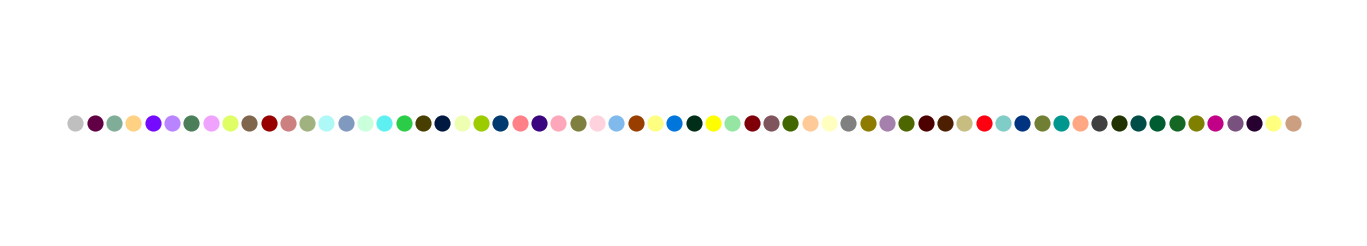

In [175]:
plt.figure(figsize=(12, 2))
for ix, j in enumerate(selected_clusters[ordering]):
    plt.scatter(ix, 0, color=cluster_colors[j], s=50)
plt.axis("off")